In [17]:
# -*- coding: utf-8 -*-
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [18]:
# 1. 读取Excel文件（请修改文件路径）
input_path = "预测数据-预处理前.xlsx"  # 输入文件路径
output_path = "预测数据-归一化后.xlsx"  # 输出文件路径
df = pd.read_excel(input_path)

In [19]:
# 2. 选择需要归一化的数值列（自动排除非数值列）
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

In [20]:
# 3. 检查是否有数值列
if not numeric_cols:
    raise ValueError("没有找到数值列进行归一化处理")

In [21]:
# 4. 选择归一化方法（根据需要选择其中一种）
# 方法一：最小-最大归一化（默认缩放到0-1）
scaler = MinMaxScaler()

In [22]:
# 5. 进行归一化处理
df_numeric = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), 
                         columns=numeric_cols)

In [23]:
# 6. 保留非数值列（如果有的话）
non_numeric_cols = list(set(df.columns) - set(numeric_cols))
if non_numeric_cols:
    df_final = pd.concat([df[non_numeric_cols], df_numeric], axis=1)
else:
    df_final = df_numeric

In [24]:
# 7. 保存结果到新Excel文件
df_final.to_excel(output_path, index=False)

print("归一化处理完成！结果已保存到:", output_path)

归一化处理完成！结果已保存到: 预测数据-归一化后.xlsx


In [12]:
# -*- coding: utf-8 -*-
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [25]:
# 参数设置
input_path = "归一化数据.xlsx"  # 归一化后的文件路径
output_dir = "直方图"  # 直方图保存目录
os.makedirs(output_dir, exist_ok=True)  # 自动创建输出目录

In [15]:
# 1. 读取归一化后的数据
df = pd.read_excel(input_path)


In [16]:
# 2. 筛选数值列（自动排除非数值列）
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

In [17]:
# 3. 设置可视化风格
sns.set(style="whitegrid", font_scale=1.2)
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文显示
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

In [18]:
# 4. 创建画布（自动计算行列布局）
n_cols = 3  # 每行显示的子图数量
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # 计算所需行数

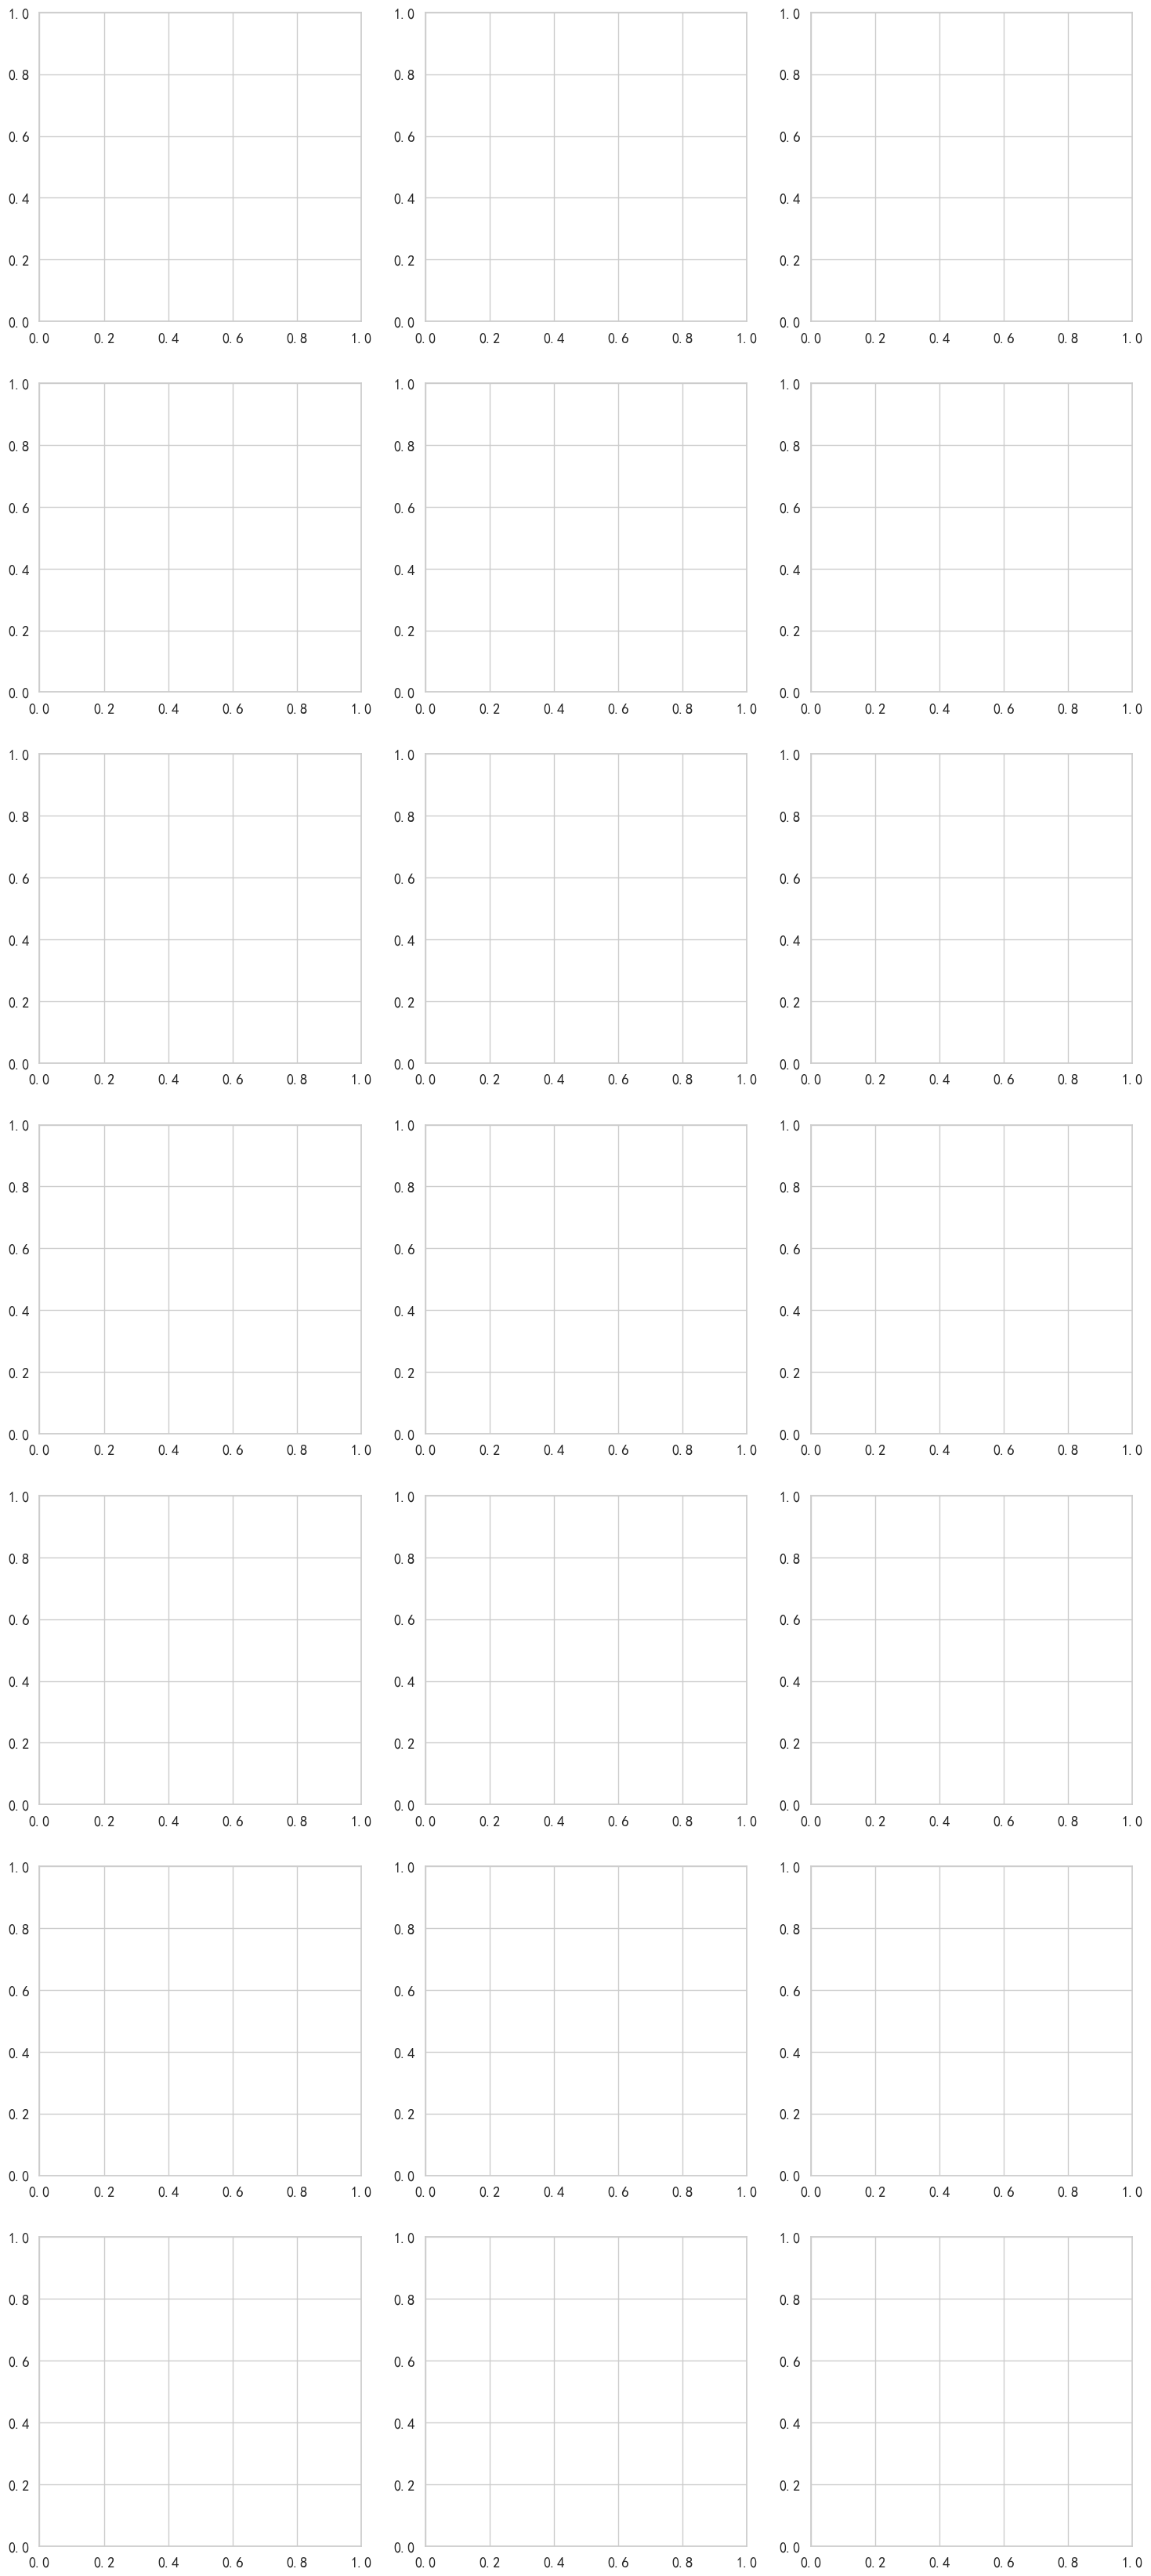

In [19]:
# 5. 创建图形布局
fig, axes = plt.subplots(n_rows, n_cols, 
                        figsize=(18, 6*n_rows),
                        dpi=100)
axes = axes.flatten()  # 将二维坐标轴数组转为一维

In [26]:
# 6. 遍历所有数值列绘制直方图
for i, col in enumerate(numeric_cols):
    ax = axes[i]
    # 绘制直方图
    sns.histplot(df[col], 
                 bins=30,  # 可调整分箱数量
                 kde=True,  # 显示核密度估计曲线
                 color='steelblue',
                 ax=ax)
    
    # 设置标题和标签
    ax.set_title(f"'{col}' 分布", pad=15)
    ax.set_xlabel("归一化值", labelpad=10)
    ax.set_ylabel("频数", labelpad=10)
    
    # 添加网格线
    ax.grid(True, linestyle='--', alpha=0.7)
    
# 移除空余坐标轴（注意缩进位置）
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

In [27]:
# 7. 调整布局并保存
plt.tight_layout(pad=3.0)
plt.savefig(os.path.join(output_dir, "all_histograms.png"), 
           bbox_inches='tight')
plt.close()

In [30]:
# 8. 同时保存单个直方图（可选）
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], bins=30, kde=True, color='teal')
    plt.title(f"'{col}' 分布", pad=15)
    plt.xlabel("归一化值", labelpad=10)
    plt.ylabel("频数", labelpad=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.savefig(os.path.join(output_dir, f"histogram_{col}.png"),
               bbox_inches='tight',
               dpi=120)
    plt.close()

print(f"直方图已保存至 {output_dir} 目录")

直方图已保存至 直方图 目录
